In [2]:
import os
import requests
import pandas as pd
import numpy as np

# --- Visualization ---
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# --- Machine Learning ---
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import (
    mean_absolute_error, mean_squared_error, r2_score
)



font_url = "https://github.com/google/fonts/raw/main/ofl/kanit/Kanit-Regular.ttf"
font_filename = "Kanit-Regular.ttf"

if not os.path.exists(font_filename):
    print(f"กำลังดาวน์โหลดฟอนต์ {font_filename} ...")
    response = requests.get(font_url)
    with open(font_filename, 'wb') as f:
        f.write(response.content)
    print("ดาวน์โหลดเสร็จสิ้น!")
else:
    print(f"พบฟอนต์ {font_filename} ในเครื่องแล้ว ใช้งานต่อได้เลย")

fm.fontManager.addfont(font_filename)


plt.rc('font', family='Kanit')
plt.rc('font', size=12)

sns.set_theme(style="whitegrid")
plt.rc('font', family='Kanit')

พบฟอนต์ Kanit-Regular.ttf ในเครื่องแล้ว ใช้งานต่อได้เลย


In [3]:
# 1. โหลดข้อมูล
df = pd.read_csv('insurance.csv') # หรือตัวแปร df_telco ของคุณ

# 2. ลบค่าว่างก่อน (สำคัญมาก! ต้องทำก่อนแปลงข้อมูล)
clean_df = df.dropna() 

# 3. แปลงข้อมูล (Encoding) **จากตัวแปรที่ลบค่าว่างแล้ว**
# สังเกตว่าใช้ clean_df ไม่ใช่ df เฉยๆ
clean_df_encoded = pd.get_dummies(clean_df, drop_first=True)

# 4. แบ่งข้อมูล (Split) **จากตัวแปรที่แปลงแล้ว**
split_data = train_test_split(
    clean_df_encoded, 
    shuffle=True, 
    test_size=0.3, 
    random_state=36
)

X_train = split_data[0].drop(columns=['charges'])
Y_train = split_data[0]['charges']
X_test = split_data[1].drop(columns=['charges'])
Y_test = split_data[1]['charges']

# 5. สร้างและสอนโมเดล (ตอนนี้ X_train จะไม่มี NaN แล้ว)
model = LinearRegression()
model.fit(X_train, Y_train)

# 6. ทำนายผล
pred_train = model.predict(X_train)
pred_test = model.predict(X_test)

print("✅ เย้! โมเดลทำงานได้แล้ว ไม่มี Error เรื่อง NaN แล้วครับ")

print("ตัวอย่างการทำนายผล:")
for i in range(5):
    print(f"จริง: {Y_test.iloc[i]:.2f}  ทำนาย: {pred_test[i]:.2f}")   

✅ เย้! โมเดลทำงานได้แล้ว ไม่มี Error เรื่อง NaN แล้วครับ
ตัวอย่างการทำนายผล:
จริง: 20177.67  ทำนาย: 4000.50
จริง: 1981.58  ทำนาย: 4135.81
จริง: 51194.56  ทำนาย: 30325.27
จริง: 6455.86  ทำนาย: 7655.52
จริง: 42112.24  ทำนาย: 33924.60


--- ผลการทดสอบ (Test Set) ---
1. เฉลี่ยแล้วทายคลาดเคลื่อน (MAE):  4,215.84 บาท
2. Error โดยรวม (RMSE):           5,926.59 บาท
3. ความแม่นยำของโมเดล (R2 Score):  75.34%


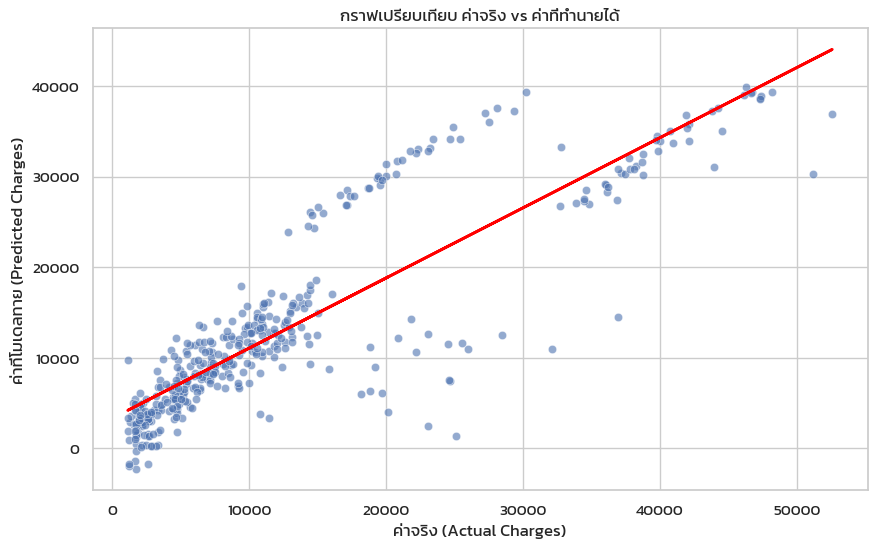

In [4]:
# 1. คำนวณค่า Error (เทียบเฉลย Y_test กับ คำตอบที่ทาย pred_test)
mae = mean_absolute_error(Y_test, pred_test)
rmse = np.sqrt(mean_squared_error(Y_test, pred_test))
score = r2_score(Y_test, pred_test)

print(f"--- ผลการทดสอบ (Test Set) ---")
print(f"1. เฉลี่ยแล้วทายคลาดเคลื่อน (MAE):  {mae:,.2f} บาท")
print(f"2. Error โดยรวม (RMSE):           {rmse:,.2f} บาท")
print(f"3. ความแม่นยำของโมเดล (R2 Score):  {score:.2%}")

# ---------------------------------------------------------

# 2. สร้างกราฟดูผลงาน (Visual Evaluation)
# กราฟนี้จะโชว์ว่า "ค่าจริง" vs "ค่าที่ทาย" ตรงกันแค่ไหน
plt.figure(figsize=(10, 6))
sns.scatterplot(x=Y_test, y=pred_test, alpha=0.6)

# วาดเส้นสีแดง (เส้นอุดมคติ ถ้าทายถูกเป๊ะ จุดจะอยู่บนเส้นนี้)
m, b = np.polyfit(Y_test, pred_test, 1)
plt.plot(Y_test, m*Y_test + b, color='red', linewidth=2)

plt.xlabel('ค่าจริง (Actual Charges)')
plt.ylabel('ค่าที่โมเดลทาย (Predicted Charges)')
plt.title('กราฟเปรียบเทียบ ค่าจริง vs ค่าที่ทำนายได้')
plt.show()

--- ปัจจัยที่ส่งผลต่อค่ารักษาพยาบาล (เรียงตามลำดับ) ---
            Feature        Impact
4        smoker_yes  23939.088317
2          children    485.786740
1               bmi    341.359614
0               age    259.535470
3          sex_male   -166.623839
5  region_northwest  -1099.755797
6  region_southeast  -1439.570967
7  region_southwest  -2211.688945
--------------------------------------------------


C:\Users\usEr\AppData\Local\Temp\ipykernel_8172\4186127353.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=coef_df, x='Impact', y='Feature', palette='viridis')


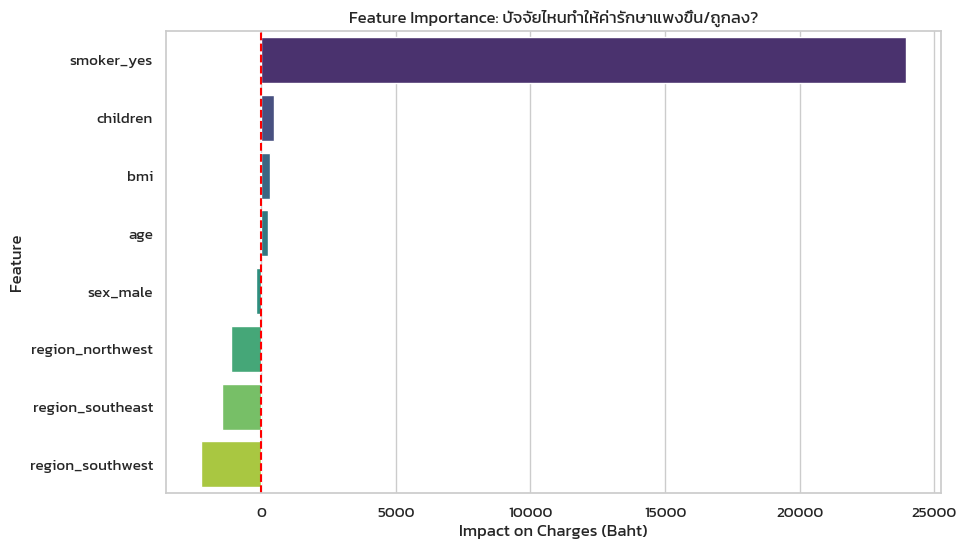

In [5]:
coef_df = pd.DataFrame({
    'Feature': X_train.columns,      # ชื่อตัวแปร
    'Impact': model.coef_            # ค่าสัมประสิทธิ์ (ผลกระทบที่เป็นตัวเงิน)
})

# 2. เรียงลำดับจากมากไปน้อย จะได้ดูง่ายๆ
coef_df = coef_df.sort_values(by='Impact', ascending=False)

# 3. แสดงผลเป็นตารางตัวเลข
print("--- ปัจจัยที่ส่งผลต่อค่ารักษาพยาบาล (เรียงตามลำดับ) ---")
print(coef_df)
print("-" * 50)

# 4. พล็อตกราฟแท่งโชว์เลย
plt.figure(figsize=(10, 6))
sns.barplot(data=coef_df, x='Impact', y='Feature', palette='viridis')

plt.title('Feature Importance: ปัจจัยไหนทำให้ค่ารักษาแพงขึ้น/ถูกลง?')
plt.xlabel('Impact on Charges (Baht)')
plt.axvline(x=0, color='red', linestyle='--') # ขีดเส้นแบ่งแดนบวก/ลบ
plt.show()

In [7]:
mean_charge = Y_test.mean() # ราคาเฉลี่ยของจริง
error_percentage = (rmse / mean_charge) * 100

print(f"ราคาเฉลี่ย (Mean Price): {mean_charge:,.2f} บาท")
print(f"RMSE (Error):           {rmse:,.2f} บาท")
print(f"คิดเป็น Error ประมาณ:    {error_percentage:.2f}%")

ราคาเฉลี่ย (Mean Price): 12,899.66 บาท
RMSE (Error):           5,926.59 บาท
คิดเป็น Error ประมาณ:    45.94%


In [8]:
from sklearn.ensemble import RandomForestRegressor

# 1. เปลี่ยนจาก LinearRegression เป็น RandomForest
# n_estimators=100 คือใช้ต้นไม้ช่วยคิด 100 ต้น
rf_model = RandomForestRegressor(n_estimators=100, random_state=36)

# 2. สอนโมเดล
rf_model.fit(X_train, Y_train)

# 3. ทำนายและวัดผลใหม่
pred_test_rf = rf_model.predict(X_test)

mae_rf = mean_absolute_error(Y_test, pred_test_rf)
rmse_rf = np.sqrt(mean_squared_error(Y_test, pred_test_rf))
score_rf = r2_score(Y_test, pred_test_rf)

# คำนวณ % Error ใหม่
mean_charge = Y_test.mean()
error_percentage_rf = (rmse_rf / mean_charge) * 100

print(f"--- ผลงานของ Random Forest ---")
print(f"R2 Score:      {score_rf:.2%} (ของเดิม ~70%)")
print(f"RMSE (Error):  {rmse_rf:,.2f} บาท")
print(f"% Error:       {error_percentage_rf:.2f}%")

--- ผลงานของ Random Forest ---
R2 Score:      82.50% (ของเดิม ~70%)
RMSE (Error):  4,992.81 บาท
% Error:       38.70%


In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# 1. สร้างโมเดล XGBoost
# n_estimators=1000: สร้างต้นไม้ 1000 ต้น
# learning_rate=0.05: ค่อยๆ เรียนรู้ทีละนิด (กัน Overfitting)
# n_jobs=-1: ใช้ CPU ทุก Core ที่มี (ทำงานไวขึ้น)
xgb_model = XGBRegressor(n_estimators=1000, learning_rate=0.05, n_jobs=-1, random_state=36)

# 2. Train โมเดล
xgb_model.fit(X_train, Y_train)

# 3. Predict & Evaluate
pred_test_xgb = xgb_model.predict(X_test)

mae_xgb = mean_absolute_error(Y_test, pred_test_xgb)
rmse_xgb = np.sqrt(mean_squared_error(Y_test, pred_test_xgb))
score_xgb = r2_score(Y_test, pred_test_xgb)

# คำนวณ % Error
mean_charge = Y_test.mean()
error_percentage_xgb = (rmse_xgb / mean_charge) * 100

print(f"--- ผลงานของ XGBoost ---")
print(f"R2 Score:      {score_xgb:.2%}")
print(f"RMSE (Error):  {rmse_xgb:,.2f} บาท")
print(f"% Error:       {error_percentage_xgb:.2f}%")

--- ผลงานของ XGBoost ---
R2 Score:      78.90%
RMSE (Error):  5,482.24 บาท
% Error:       42.50% (จากเดิม 38.70%)


In [19]:
# 1. รีเซ็ตข้อมูลใหม่ก่อน
df = pd.read_csv('insurance.csv')
clean_df = df.dropna()
clean_df_encoded = pd.get_dummies(clean_df, drop_first=True)

# ---------------------------------------------------------
# 🔥 HERE IS THE MAGIC! สร้างตัวแปรใหม่
# ---------------------------------------------------------
# สร้างตัวแปรที่บอกว่า "อ้วนและสูบด้วย" (ความเสี่ยงคูณสอง)
# ถ้า smoker_yes = 1 และ bmi สูง -> ค่านี้จะสูงมาก
# ถ้า smoker_yes = 0 -> ค่านี้จะเป็น 0 เลย

# ---------------------------------------------------------

# 2. แบ่งข้อมูลใหม่ (ต้องแบ่งหลังสร้างตัวแปรแล้ว)
split_data = train_test_split(clean_df_encoded, shuffle=True, test_size=0.3, random_state=36)

X_train = split_data[0].drop(columns=['charges'])
Y_train = split_data[0]['charges']
X_test = split_data[1].drop(columns=['charges'])
Y_test = split_data[1]['charges']

# 3. ลองรัน Random Forest หรือ XGBoost อีกรอบ
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=36)
model.fit(X_train, Y_train)
pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(Y_test, pred))
score = r2_score(Y_test, pred)
print(f"R2 Score ใหม่: {score:.2%}")
print(f"Error (RMSE) ใหม่: {rmse:,.2f}")
print(f"% Error:{error_percentage_xgb:.2f}% (จากเดิม 38.70%)")

R2 Score ใหม่: 82.50%
Error (RMSE) ใหม่: 4,992.81
% Error:42.50% (จากเดิม 38.70%)


In [20]:
import statsmodels.api as sm

# 1. แปลงข้อมูล X_train ให้เป็นตัวเลขทศนิยม (float) ทั้งหมดก่อน
# เพื่อแก้ปัญหา True/False หรือ Object ที่หลงเหลืออยู่
X_train_numeric = X_train.astype(float) 
Y_train_numeric = Y_train.astype(float)

# 2. ต้องบวกค่าคงที่ (Constant) เข้าไปเอง
X_train_sm = sm.add_constant(X_train_numeric)

# 3. สร้างโมเดลแบบ OLS
ols_model = sm.OLS(Y_train_numeric, X_train_sm).fit()

# 4. ปริ้นตารางสรุปผล
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.749
Model:                            OLS   Adj. R-squared:                  0.747
Method:                 Least Squares   F-statistic:                     345.2
Date:                Wed, 31 Dec 2025   Prob (F-statistic):          1.35e-271
Time:                        13:30:19   Log-Likelihood:                -9465.3
No. Observations:                 934   AIC:                         1.895e+04
Df Residuals:                     925   BIC:                         1.899e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1.141e+04   1205.493  

--- ปัจจัยที่ส่งผลต่อค่ารักษาพยาบาล (เรียงตามลำดับ) ---
            Feature        Impact
4        smoker_yes  23939.088317
2          children    485.786740
1               bmi    341.359614
0               age    259.535470
3          sex_male   -166.623839
5  region_northwest  -1099.755797
6  region_southeast  -1439.570967
7  region_southwest  -2211.688945
--------------------------------------------------


C:\Users\usEr\AppData\Local\Temp\ipykernel_8172\3959370074.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=coef_df, x='Impact', y='Feature', palette='viridis')


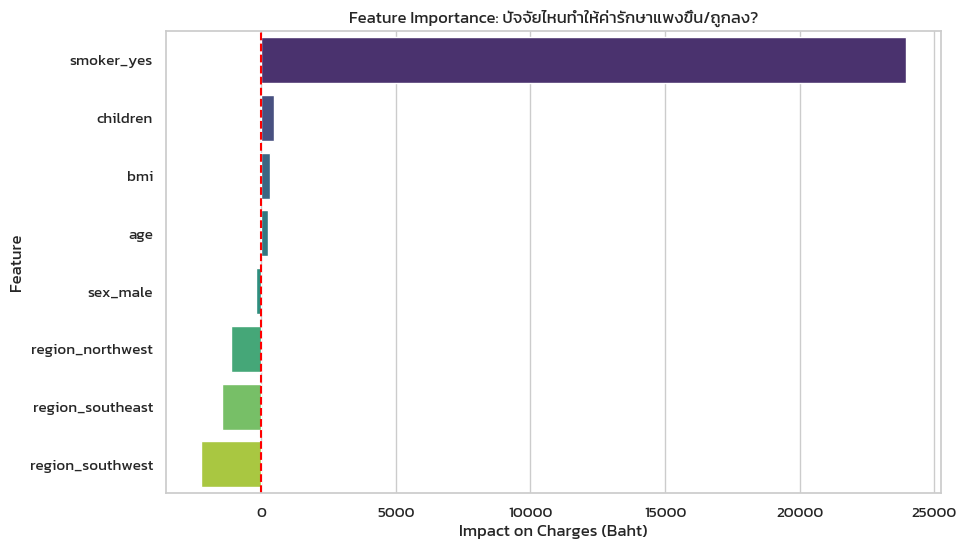

In [23]:
rf_df = pd.DataFrame({
    'Feature': X_train.columns,      # ชื่อตัวแปร
    'Impact': model.feature_importances_            # ค่าสัมประสิทธิ์ (ผลกระทบที่เป็นตัวเงิน)
})

# 2. เรียงลำดับจากมากไปน้อย จะได้ดูง่ายๆ
coef_df = coef_df.sort_values(by='Impact', ascending=False)

# 3. แสดงผลเป็นตารางตัวเลข
print("--- ปัจจัยที่ส่งผลต่อค่ารักษาพยาบาล (เรียงตามลำดับ) ---")
print(coef_df)
print("-" * 50)

# 4. พล็อตกราฟแท่งโชว์เลย
plt.figure(figsize=(10, 6))
sns.barplot(data=coef_df, x='Impact', y='Feature', palette='viridis')

plt.title('Feature Importance: ปัจจัยไหนทำให้ค่ารักษาแพงขึ้น/ถูกลง?')
plt.xlabel('Impact on Charges (Baht)')
plt.axvline(x=0, color='red', linestyle='--') # ขีดเส้นแบ่งแดนบวก/ลบ
plt.show()